# Day_001_example_of_metrics
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

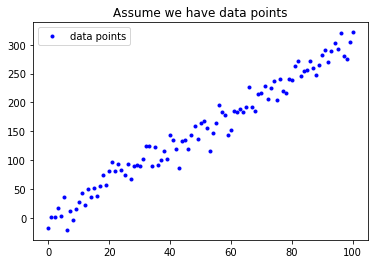

In [17]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

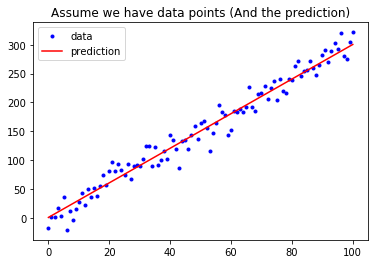

In [18]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [19]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    mse = sum((y - yp)**2) / len(y)
    return mse

MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 260.262
The Mean absolute error is 12.791


# Day036_evaluation_metrics

In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

## 回歸問題
常見的評估指標有
- MAE
- MSE
- R-square

我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.8417972525655664
MSE:  12.488680067398237
R-square:  0.9916581036260311


## 分類問題
常見的評估指標有
- AUC
- F1-Score (Precision, Recall)

In [3]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [4]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [5]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [6]:
print(y_pred)

[0.14923589 0.10129278 0.51990111 0.14734495 0.25281832 0.50811383
 0.05081365 0.3077542  0.38390266 0.02057305 0.85409559 0.4439018
 0.15640132 0.2880761  0.39597483 0.82820134 0.34500803 0.55420952
 0.05617753 0.0657394  0.66712064 0.33672983 0.12931057 0.13833957
 0.04969256 0.12197092 0.37751677 0.91919279 0.68795771 0.98761929
 0.84789058 0.28998278 0.02245731 0.27322489 0.67314746 0.60586534
 0.99628945 0.84291559 0.33429977 0.32788017 0.52793323 0.53407199
 0.21682125 0.93370133 0.14670204 0.91838042 0.76901394 0.41727611
 0.68954033 0.65156638]


### AUC

In [7]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.43463497453310695


## F1-Score

In [8]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.4230769230769231
Precision:  0.5238095238095238
Recall:  0.3548387096774194


## 練習時間
請參考 F1-score 的公式與[原始碼](https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/metrics/classification.py#L620)，

### F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同
請參考 F1-score 的[公式](https://en.wikipedia.org/wiki/F1_score) 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數

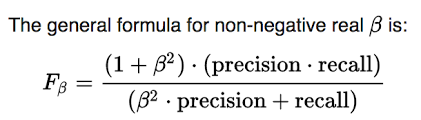

In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, fbeta_score

In [10]:
y_pred = np.random.randint(2, size=100)
y_true = np.random.randint(2, size=100)

In [11]:
def custom_fbeta_score(y_true, y_pred, beta=1):
    precision = precision_score(y_true, y_pred) # 計算 Precision
    recall = recall_score(y_true, y_pred) # 計算 Recall
    
    fbeta = (1+ (beta)**2) * (precision*recall) / (((beta)**2*precision) + recall)
    return fbeta   

In [12]:
print(custom_fbeta_score(y_true, y_pred, beta=2))

0.5023923444976077


In [13]:
fbeta_score(y_true, y_pred, beta=2)

0.5023923444976077